# An end-to-end ML Model Monitoring Workflow with NannyML in Python

## Table of contents

1. Why monitor models?
2. What will you learn in this tutorial?
3. Prerequisites concepts covered
4. What does an end-to-end ML model monitoring workflow look like?
5. Step 1: Prepare the data
6. Step 2: Estimating performance
7. Step 3: Estimated vs. realized performance
8. Step 4: Calculating and estimating business value
9. Step 5: Multivariate drift detection
10. Step 6: Univariate drift detection
11. Step 7: Issue resolution
12. Conclusion

## Why monitor models?

Machine learning projects are iterative processes. You don't just stop at a successful model inside a Jupyter notebook. You don't even stop after the model is online and people can access it. Even after deployment, you have to constantly babysit it so that it works just as well as it did during the development phase.

Zillow's scandal is a perfect example of what happens if you don't. In 2021, Zillow lost a stunning 304 million dollars because of their machine learning model that estimates houses for purchase. Zillow overpaid for more than 7000 homes and had to offload them at a much lower price. The company was "ripped off" by its own model and had to reduce their workforce by 25%. 

These types of silent model failures are common with real-world models, so they need to be constantly updated before their production performance drops. Failing to do so damages companies' reputation, trust with stakeholders and ultimately, pockets. 

This article will teach you how to implement an end-to-end workflow to monitor machine learning models after deployment with NannyML.

## What is NannyML?

NannyML is a growing open-source library focused on post-deployment machine learning. It offers a wide range of features to solve all types of problems that arise in production ML environments. To name a few:n-technical users.

- **Drift Detection**: Detects data distribution changes between training and production data.
- **Performance Estimation**: Estimates model performance in production without immediate ground truth.
- **Automated Reporting**: Generates reports on deployed model health and performance.
- **Alerting System**: Provides alerts for data drift and performance issues.
- **Model Fairness Assessment**: Monitors model fairness to prevent biases.
- **Compatibility with ML Frameworks**: Integrates with popular machine learning frameworks.
- **User-Friendly Interface**: Offers a familiar scikit-learn like interface.

We will learn the technical bits of these features one-by-one.

## What will you learn in this tutorial?

Apart from NannyML's API, you will learn several key concepts regarding post-production machine learning. The article will provide you a framework you can follow in any ML project for monitoring. Here is the table of contents for full details:

PASTE the table of contents here.

## Prerequisite concepts covered

We will learn the fundamental concepts of model monitoring through the analogy of a robot mastering archery.

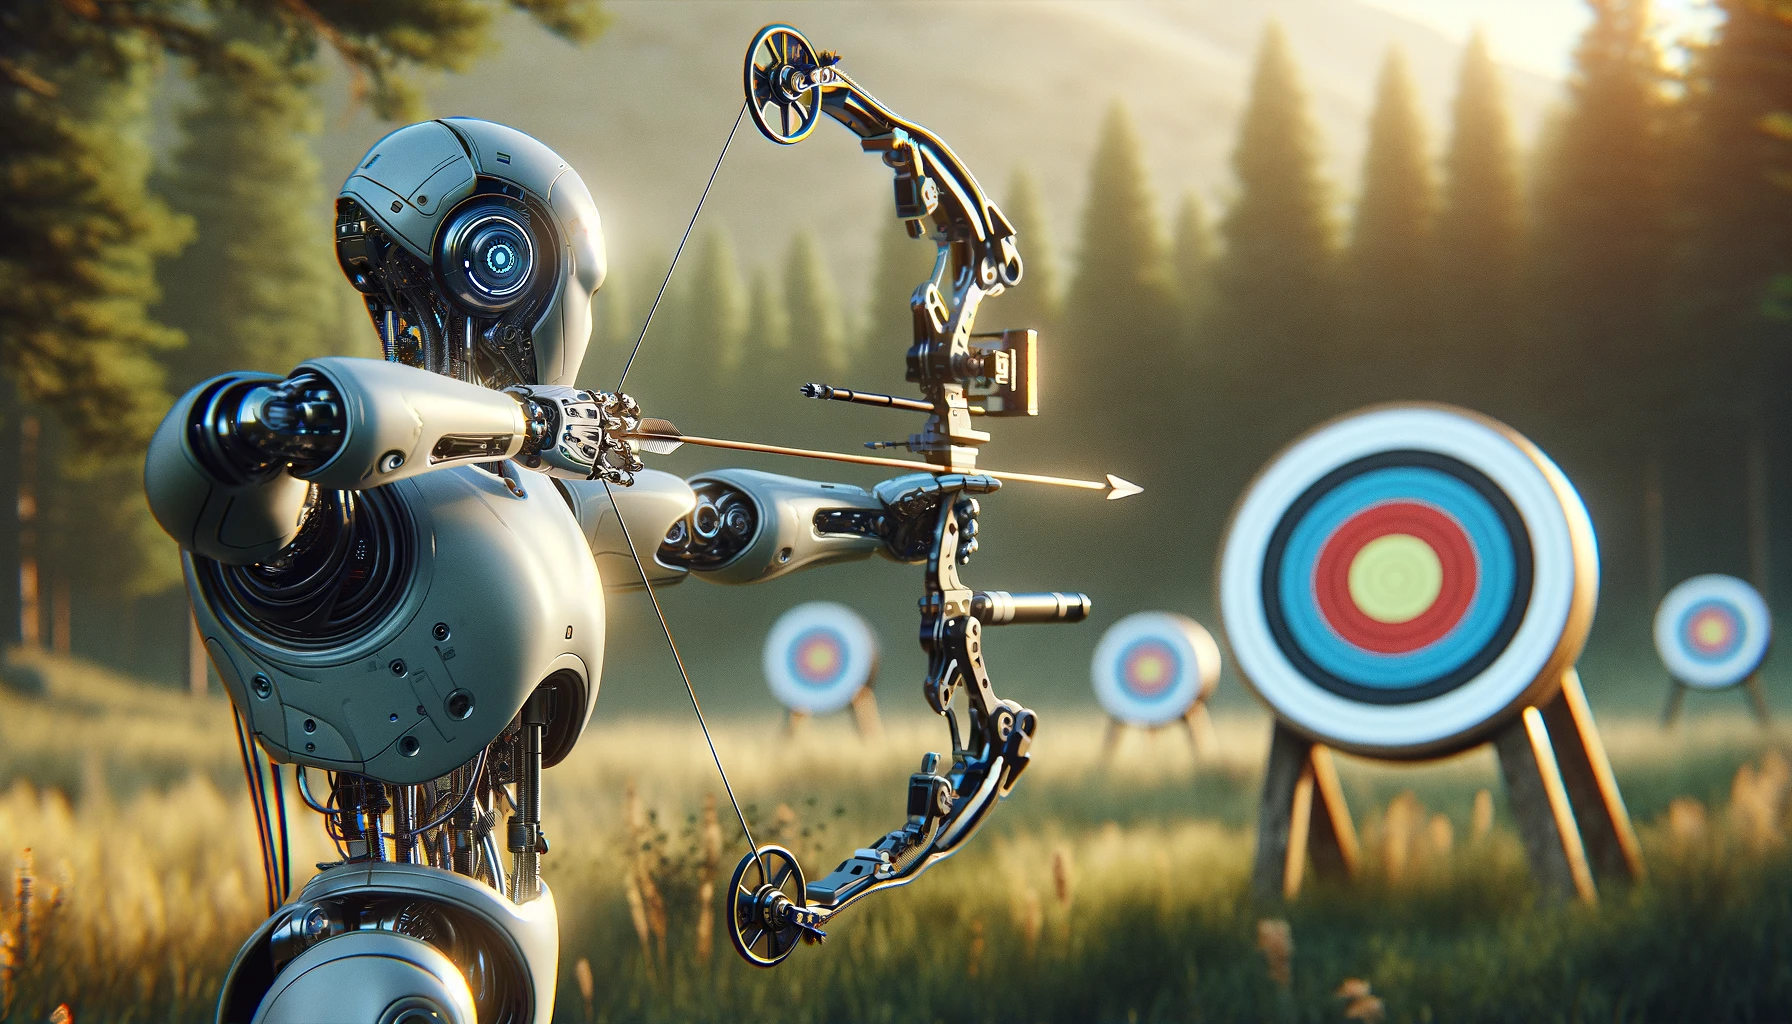

In our analogy:
- Robot represents our machine learning model.
- The target represents the goal or objective of our model.
- We can say this is a regression problem since scores are calculated based on how close the arrows are shot to the bull's eye - the red dot in the center.
- The characteristics of the arrows and bow, alongside the robot’s physical attributes and environmental conditions (like wind and weather), are the features or input variables of our model.

So, let's start.

### Data Drift

Imagine we've carefully prepared the bow, arrows and target (like data preparation). Our robot, equipped with many sensors and cameras, shoots 10000 times during training. Over time, it starts to hit the bull's eye with impressive frequency. We are thrilled with the performance and begin selling our robot and its copies to archery lovers (deploying the model).

But soon, we get a stream of complaints. Some users report that the robot is totally missing the target. Surprised, we gather a team to discuss what went wrong. 

What we find is a classic case of data drift. The environment in which the robots are operating has changed - different wind patterns, varying humidity levels, and even changes in the physical characteristics of the arrows (weight, balance) and bow. This real-world shift in input features has thrown off our robot's accuracy, similar to how a machine learning model might underperform when input data evolves over time. 

### Concept drift

After addressing these issues, we release a new batch of robots. Yet, in a few weeks, similar complaints flow in. Puzzled, we dig deeper and discover that the targets have been frequently replaced by users. 

These new targets vary in size and are placed at varying distances. This change requires a different approach in the robot's shooting technique - a textbook example of concept drift. 

In machine learning terms, concept drift happens when the relationship between the input variables and the target outcome alters. For our robots, the new types of targets meant they had to adapt to shooting differently, just as a machine learning model needs to adjust when the dynamics of the data it was trained on change significantly.

### More real-world examples of concept and data drift

To drive the points home, let's explore some real-world examples of how data and concept drift occurs.

#### Data drift examples
1. **Credit scoring models**: Economic shifts change people's spending and credit habits. If a credit scoring model doesn't adapt, it might lead to either unjustified rejections or risky approvals.
2. **Health monitoring systems**: In healthcare, changes in user demographics or sensor calibration can lead to inaccurate health assessments from models monitoring patient vitals.
3. **Retail demand forecasting**: In retail, shifts in consumer behavior and trends can render past sales data-based models ineffective in predicting current product demand.

#### Concept drift examples
1. **Social media content moderation**: Content moderation models must constantly adapt to evolving language and cultural phenomenon, or risk misclassifying what's considered inappropriate.
2. **Autonomous vehicles**: Models in self-driving cars must be updated for region-based traffic rules and conditions for best performance.
3. **Fraud detection  models**: as fraudulent tactics evolve, fraud detection models need updates to identify emerging patterns.

## What does an end-to-end ML model monitoring workflow look lie?

Model monitoring involves three major steps that ML engineers should follow iteratively.

### 1. Monitoring performance
The first step is, of course, keeping a close eye on model performance in deployment. But this is easier said than done. 

When ground truth is immediately available for a model in production, it is easy to detect changes in model behavior. For example, the users can immediately tell what's wrong in our robot/archery analogy because they can look at the target and tell us that the robot missed - immediate ground truth.

In contrast, take the example of a model that predicts loan defaults. Such models predict whether a user defaults on the next payment or not. To verify the prediction, the model must wait until the actual payment date. This is an example of **delayed ground truth**, which is most common in real-world machine learning systems. 

In such cases, it is too costly to wait for the ground truth to be available to see if models are performing well. So, ML engineers need methods to estimate model performance without them. This is where algorithms such as CBPE or DLE come in (more on them in a second).

Monitoring models can also be done through measuring the direct business impact, i.e. monitoring KPIs (key performance indicators). In Zillow's case, a proper monitoring system could have detected profit loss and alerted the engineers (hypothetically).

### 2. Root cause analysis

If the monitoring system detects a performance drop, regardless of whether system analyzed realized performance (with ground truth) or estimated performance (without ground truth), ML engineers must identify the cause behind the drop.

This usually involves checking features individually or in combination for data (feature drift) and examining the targets for concept drift. 

Based on their findings, they employ various issue resolution techniques.

### 3. Issue resolution

Here is a non-exclusive techniques to mitigate the damages caused by post-deployment performance degradation:

1. Data rebalancing: If the performance drop is due to data drift, adjusting the training dataset to reflect current conditions is a good option.
2. Feature engineering: Updating or creating new features can improve model performance. This is a good approach in cases of concept drift, where the relationship between inputs and outputs has changed.
3. Model retraining: a more expensive method is retraining the model with fresh data to ensure it remains accurate. This works against both data and concept drift.
4. Model fine-tuning: Instead of retraining from scratch, some models can be fine-tuned on a recent dataset. This works well with deep learning and generetive models.
5. Anomaly detection: Using anomaly (novelty) detection methods may identify unusual patterns in production data early.
6. Domain expertise involvement: Attracting domain experts, may provide deep insights into why the models might be underperforming.

Each method has its application context, and often you may end up implementing a combination of them. 

NannyML deals with issue detection - the first two steps of this iterative process. So, let's get down to it.

## Step 1: Preparing the data for NannyML

Apart from training and validation sets, NannyML requires two additional sets called a reference and analysis in specific formats. This section teaches you how to create them from any data.

First, we need a model that is already trained and ready to be deployed into production so that we can monitor it. For this purpose, we will use the diamonds dataset and training an XGBoost regressor. 

### Loading data, defining features and target

In [22]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings("ignore")

The first step after importing modules is to load the Diamonds dataset from Seaborn. However, we will be using a special version of the dataset that I specifically prepared for this article to illustrate how monitoring looks like. You can load the dataset into a new virtual environment using the snippet below:

In [23]:
dataset_link = "https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2024/1_january/4_intro_to_nannyml/diamonds_special.csv"

diamonds_special = pd.read_csv(dataset_link)
diamonds_special.head()

carat      cut color clarity  depth  table  price     x     y     z    set
0   0.32    Ideal     I    VVS2   61.5   56.0    720  4.42  4.40  2.71  train
1   1.54  Premium     F     SI1   62.8   58.0   9926  7.35  7.32  4.61  train
2   0.71    Ideal     F     VS1   62.1   56.0   3457  5.69  5.75  3.55  train
3   1.03    Ideal     F    VVS2   62.0   56.0   9413  6.48  6.45  4.01  train
4   1.33    Ideal     J     VS1   62.4   55.0   6190  7.02  7.05  4.39  train

This special version of the dataset has a column named "set", which we will get to in a second. For now, we will extract all feature names, the categorical feature names and the target name:

In [24]:
# Extract all feature names
all_feature_names = diamonds_special.drop("price", axis=1).columns.tolist()

# Extract the numeric features
numeric_feature_names = diamonds_special.select_dtypes(include=np.number).columns
numeric_feature_names = numeric_feature_names.tolist()

# Extract the columns and cast into category
cats = diamonds_special.select_dtypes(exclude=np.number).columns

# Define the target column
target = "price"

The task is a regression - we will be predicting diamond prices given their physical attributes.

The diamonds dataset is fairly clean. So, the only preprocessing we perform is casting the text features into Pandas `category` data type. This is a requirement to enable automatic categorical data preprocessing by XGBoost.

In [25]:
for col in cats:
    diamonds_special[col] = diamonds_special[col].astype("category")

Let's move on to splitting the data.

### Splitting the data into four sets

Yes, you read that right. We will be splitting the data into four sets. Traditionally, you may have only split it into three:

- Training set for the model to learn patterns
- Validation set for hyperparameter tuning
- Testing set for final evaluation before deployment

Model monitoring workflows requires another set to mimic production data. This is to ensure that our system correctly detects performance drops by using the right algorithms and report what went wrong. 

For this purpose, I've labeled the rows of Diamonds Special with four categories in the `set` column:

In [26]:
diamonds_special.set.unique()

['train', 'validation', 'test', 'prod']
Categories (4, object): ['prod', 'test', 'train', 'validation']

Training set represents 70%, while the rest is 10% each of the total data. Let's split it:

In [27]:
tr = diamonds_special[diamonds_special.set == "train"]
val = diamonds_special[diamonds_special.set == "validation"]
test = diamonds_special[diamonds_special.set == "test"]
prod = diamonds_special[diamonds_special.set == "prod"]

tr.shape

(37758, 11)

But, real-world datasets don't come with in-built set labels, so you have to split the data manually into four sets yourself. Here's a function that does the task using `train_test_split` from `sklearn`:

```python
def split_into_four(df, train_size=0.7):
    """
    A function to split a dataset into four sets:
    - Training
    - Validation
    - Testing
    - Production
    train_size is set by the user.
    The remaining data will be equally divided between the three sets.
    """
    # Do the splits
    training, the_rest = train_test_split(df, train_size=train_size)
    validation, the_rest = train_test_split(the_rest, train_size=1 / 3)
    testing, production = train_test_split(the_rest, train_size=0.5)

    # Reset the indices
    sets = (training, validation, testing, production)
    for set in sets:
        set.reset_index(inplace=True, drop=True)

    return sets


tr, val, test, prod = split_into_four(your_dataset)
```

> Note: Use the "Explain code" button to get a line-by-line explanation of the function.

Now, let's move on to model training.

### Training a model

Before training an XGBoost model, we need to convert the datasets into DMatrices. Here is the code:

In [28]:
dtrain = xgb.DMatrix(tr[all_feature_names], label=tr[target], enable_categorical=True)
dval = xgb.DMatrix(val[all_feature_names], label=val[target], enable_categorical=True)

dtest = xgb.DMatrix(
    test[all_feature_names], label=test[target], enable_categorical=True
)
dprod = xgb.DMatrix(
    prod[all_feature_names], label=prod[target], enable_categorical=True
)

Now, here is the code to train a regressor with hyperparameters already tuned:

In [29]:
# Define optimized parameters
params = {
    "n_estimators": 10000,
    "learning_rate": 0.1,
    "tree_method": "gpu_hist",
    "max_depth": 6,
    "min_child_weight": 1,
    "gamma": 0,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "objective": "reg:squarederror",
    "reg_alpha": 0.01,
    "reg_lambda": 1,
}

# Training with early stopping
regressor = xgb.train(
    params,
    dtrain,
    num_boost_round=10000,
    evals=[(dtrain, "train"), (dval, "eval")],
    early_stopping_rounds=50,
    verbose_eval=500,
)

[0]	train-rmse:3646.83144	eval-rmse:3591.69366
[150]	train-rmse:414.62121	eval-rmse:525.94731


Great - we have a model that achieves 414$ in terms of RMSE on the validation set. Let's evaluate the model one final time on the test set:

In [30]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_test_pred = regressor.predict(dtest)

# Evaluate
mean_squared_error(test[target], y_test_pred, squared=False)

525.8572571453456

The testing performance is 525$. That's good enough.

### Creating a reference set

Up until this point, everything was pretty straightforward. Now, we come to the main part - creating reference and analysis sets. 

Reference set is another name for the test set used in model monitoring context. NannyML uses the model's performance on the test set as a baseline for production performance. The reference set must have two columns apart from the features:

- The target itself - the ground truth - diamond prices
- The testing predictions - we've generated them into `y_test_pred`

Right now, our `test` set contains the features and the target but is missing `y_test_pred`:

In [31]:
test.columns  # Ignore the `set` column

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'set'],
      dtype='object')

Let's add it:

In [32]:
test["y_pred"] = y_test_pred

Now, we will rename the test set into `reference`:

In [33]:
reference = test.copy(deep=True)

reference.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'set', 'y_pred'],
      dtype='object')

### Creating an analysis set

At this point, let's imagine that our regressor is deployed into the cloud. Imagining is simpler than actually deploying the model, which is overkill for this article. 

After we deploy our diamonds pricing model, we receive the news that a large shipment of diamonds is coming. Before the cargo arrives, the physical measurements of diamonds have been sent to us as `prod` (we are still imagining) so that we can generate prices for them and start marketing them on our website. So, let's generate.

In [34]:
# Generate prices for production data
y_prod_pred = regressor.predict(dprod)

Before the actual diamonds arrive and a human specialist verifies the prices generated by our model, we have to check if our model is performing well. We don't want to display the diamonds with inaccurate prices on our website.

To do this, we would need to measure the performance of the model by comparing `y_prod_pred` to actual prices of new diamonds, the ground truth. But, we won't have ground truth before the prices are verified. So, we would need to estimate the performance of the model without ground truth. 

To do this task, NannyML requires an analysis set - the data that contains the production data with predictions made by the model. 

Creating an analysis set is similar to creating a `reference`:

In [35]:
# Add the predictions of new diamonds to prod
prod["y_pred"] = y_prod_pred

analysis = prod.copy(deep=True)
analysis.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'set', 'y_pred'],
      dtype='object')

Now, we are ready to estimate the performance of `regressor`.

## Step 2: Estimating performance in NannyML

NannyML provides two major algorithms for estimating performance of regression and classification models:
- Direct Loss Estimation (DLE) for regression
- Confidence Based Performance Estimation (CBPE) for classification

We will use the `DLE` algorithm for our task. `DLE` can measure the performance of a production model without ground truth and report various regression pseudo-metrics such as RMSE, RMSLE, MAE, etc. 

To use `DLE`, we first need to fit it to `reference` to establish a baseline performance.

### Estimating performance using DLE in NannyML

In [38]:
import nannyml  # pip install nannyml

estimator = nannyml.DLE(
    feature_column_names=all_feature_names,
    y_true=target,
    y_pred="y_pred",
    metrics=["rmse"],
    chunk_size=250,
)

Initializing `DLE` requires three parameters - the input feature names, the name of the column containing ground truth for testing and the name of the column containing testing predictions. 

Additionally, we are also passing RMSE as a metric and a chunk size of 250. Let's fit the estimator to `reference` and estimate performance on `analysis`:

In [39]:
# Fit to the reference set
estimator.fit(reference)

# Estimate on the analysis set
estimated_results = estimator.estimate(analysis)
estimated_results

We have a `Result` object which can be plotted. Let's see what it produces:

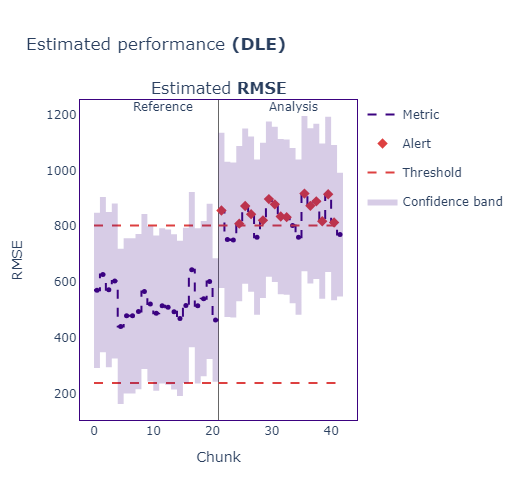

In [40]:
estimated_results.plot().show()

Let's interpret the plot - it has two sections that displays performance on the reference and analysis sets. If the estimated production RMSE goes up beyond the thresholds, NannyML marks them as alerts. 

As we can see, we have many alerts for production data, suggesting something fishy is going on here.

## Step 3: Estimated vs. realized performance in monitoring

Our monitoring system tells us that model performance dropped by about half in production. But it is only an estimate - we can't say it for certain.

While we are plotting the estimated performance, the shipment has arrived and our diamonds specialist calculated their actual price. We've stored them as `price` into `prod`. 

Now, we can compare realized performance (actual performance) of the model against estimated performance to see if our monitoring system is working well.

NannyML provides with a `PerformanceCalculator` class to do so:

In [42]:
calculator = nannyml.PerformanceCalculator(
    problem_type="regression",
    y_true=target,
    y_pred="y_pred",
    metrics=["rmse"],
    chunk_size=250,
)

calculator.fit(reference)
realized_results = calculator.calculate(analysis)

The class requires four parameters:
- `problem_type`: What's is the task?
- `y_true`: What are the labels?
- `y_pred`: Where can I find the predictions?
- `metrics`: Which metrics do I use to calculate the performance?

After passing those and fitting the calculator to `reference`, we `calculate` on the analysis set. 

To compare `realized_results` to `estimated_results`, we use a visual again:

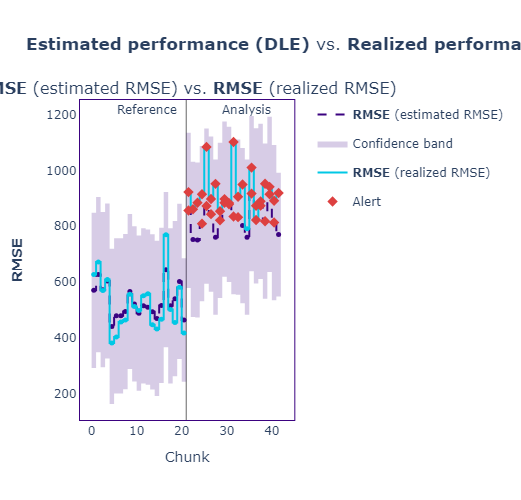

In [43]:
estimated_results.compare(realized_results).plot().show()

Well, looks like the estimated RMSE (purple) was pretty close to the actual performance (realized RMSE, blue). 

This tells us one thing - our monitoring system is working well but our model isn't, indicated by the raising loss. So, what is the reason(s)?

We will dive into this now.

## Step 4: Drift detection methods

### Multivariate drift detection

### Univariate drift detection

## Step 5: Solutions to monitoring problems

## Conclusion